# Task 1 

# Importing all the files from attached zip into the directory- "All_datasets"



In [ ]:
!pip install ts2vg
!pip install igraph
!pip install pycairo
!pip install cairocffi
!pip install tabulate
!pip install -U prettytable


In [4]:
#Importing Necessary files

import pandas as pd
import glob
import numpy as np
from ts2vg import NaturalVG
from ts2vg import HorizontalVG
import os
from tabulate import tabulate
from io import StringIO 
import prettytable 
import seaborn as sns
import matplotlib.pyplot as plt
import os as os_lib

In [ ]:
# Read all the files from local directory into "All_datasets"
!mkdir All_datasets

os_lib.chdir("/content/All_datasets")
from google.colab import files
uploaded = files.upload()

In [ ]:
# Applying Natural and Horizontal Visibility Graph on the datasets

tabcols = pd.DataFrame(columns = ["Method", "Subject","Accelerometer axis", "Average degree", "Network diameter", "Average path length", "Activity"])

axis1 = ["X","Y","Z"]
myframes = ["running_chest"  , "walking_chest" ,"climbingup_chest" ,"climbingdown_chest" ]
acti = ["running","walking","climbingup","climbingdown"]
attr = ['attr_x', 'attr_y','attr_z']

#creating a loop to iterate through the directory
#Creating another two loops to iterate through the list (mentioned above)
for i in range(1,16):
    for redf,actir in zip(myframes,acti):
        for ax ,att in zip(axis1,attr):
            #Reading the csv file from the directory and iterating through them
            redf = pd.read_csv("/content/All_datasets/" + actir +"_subject"+str(i)+ ".csv")
     

            #--------------------------------------------Natural Visibility Graph------------------------------------------

            #Calculating X,Y,Z for all activities
            g = NaturalVG()
            
            g.build(redf[att][1000:2024])
            ig_gy_nvg = g.as_igraph()
            
            nvg_degree = np.mean(ig_gy_nvg.degree())
            nvg_diameter = ig_gy_nvg.diameter()
            nvg_path =ig_gy_nvg.average_path_length()

            Data_dicty = {"Method":'NVG', "Subject" :i,"Accelerometer axis":ax, "Average degree":nvg_degree , "Network diameter": nvg_diameter, "Average path length": nvg_path, "Activity":actir}
            tabcols = tabcols.append(Data_dicty,ignore_index=True)

            #--------------------------------------------Horizontal Visibility Graph------------------------------------------
            #Calculating X,Y,Z for all activities
          
            g = HorizontalVG()
            
            g.build(redf[att][1000:2024])
            ig_gy_hvg = g.as_igraph()
            
            hvg_degree = np.mean(ig_gy_hvg.degree())
            hvg_diameter = ig_gy_hvg.diameter()
            hvg_path =ig_gy_hvg.average_path_length()

            Data_dicty = {"Method":'HVG', "Subject" :i,"Accelerometer axis":ax, "Average degree":hvg_degree , "Network diameter": hvg_diameter, "Average path length": hvg_path, "Activity":actir}
            tabcols = tabcols.append(Data_dicty,ignore_index=True)

            

tabcols.index = np.arange(1, len(tabcols)+1)
tabcols

In [ ]:
#-----------------------------------------------Display table----------------------------------------------------------------------
output = StringIO()
tabcols.to_csv(output)
output.seek(0)
Table_format = prettytable.from_csv(output)

Table_format


[Text(0.5, 1.0, 'Average Degree vs Network Diameter (HVG)(z - axis)')]

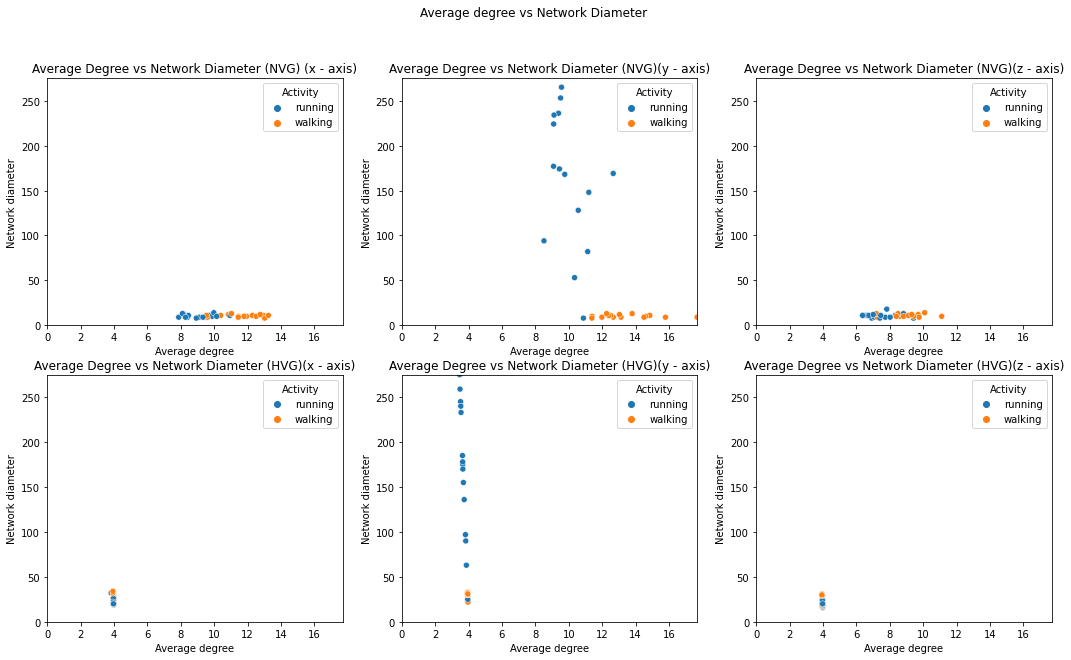

In [25]:
#Plotting Average degree vs Network diameter for Walking and Running
act = ["walking","running"]
activities_list = tabcols.loc[tabcols['Activity'].isin(act)]

#Storing the data for Natural Visualization graph

b= activities_list.loc[(activities_list['Method'] == 'NVG') ]
wrnvgx = b.loc[(b['Accelerometer axis'] == "X") ] 
wrnvgy = b.loc[(b['Accelerometer axis'] == "Y") ]
wrnvgz = b.loc[(b['Accelerometer axis'] == "Z") ]

#Storing the data for Natural Visualization graph

b= activities_list.loc[(activities_list['Method'] == 'HVG') ]
wrhvgx = b.loc[(b['Accelerometer axis'] == "X") ] 
wrhvgy = b.loc[(b['Accelerometer axis'] == "Y") ]
wrhvgz = b.loc[(b['Accelerometer axis'] == "Z") ]


#Plotting the data

fig, axes = plt.subplots(2, 3, figsize=(18, 10))


custom_ylim = (0,max(activities_list['Network diameter']))
custom_xlim = (0, max(activities_list['Average degree']))

# Setting the values for all axes.
plt.setp(axes, xlim=custom_xlim, ylim=custom_ylim)
fig.suptitle('Average degree vs Network Diameter')

sns.scatterplot(ax=axes[0, 0], data=wrnvgx, x='Average degree', y='Network diameter', legend = 'full',hue ='Activity').set(title='Average Degree vs Network Diameter (NVG) (x - axis)')
sns.scatterplot(ax=axes[0, 1], data=wrnvgy, x='Average degree', y='Network diameter', legend = 'full',hue ='Activity').set(title='Average Degree vs Network Diameter (NVG)(y - axis)')
sns.scatterplot(ax=axes[0, 2], data=wrnvgz, x='Average degree', y='Network diameter', legend = 'full',hue ='Activity').set(title='Average Degree vs Network Diameter (NVG)(z - axis)')
sns.scatterplot(ax=axes[1, 0], data=wrhvgx, x='Average degree', y='Network diameter', legend = 'full',hue ='Activity').set(title='Average Degree vs Network Diameter (HVG)(x - axis)')
sns.scatterplot(ax=axes[1, 1], data=wrhvgy, x='Average degree', y='Network diameter', legend = 'full',hue ='Activity').set(title='Average Degree vs Network Diameter (HVG)(y - axis)')
sns.scatterplot(ax=axes[1, 2], data=wrhvgz, x='Average degree', y='Network diameter', legend = 'full',hue ='Activity').set(title='Average Degree vs Network Diameter (HVG)(z - axis)')



In [ ]:
#Plotting Average degree vs Network diameter for Climbingup and Cimbingdown

act = ["climbingup","climbingdown"]
activities_list = tabcols.loc[tabcols['Activity'].isin(act)]

#Storing the data for Natural Visualization graph

b= activities_list.loc[(activities_list['Method'] == 'NVG') ]
cudnvgx = b.loc[(b['Accelerometer axis'] == "X") ] 
cudnvgy = b.loc[(b['Accelerometer axis'] == "Y") ]
cudnvgz = b.loc[(b['Accelerometer axis'] == "Z") ]

#Storing the data for Horizontal Visualization graph

b= activities_list.loc[(activities_list['Method'] == 'HVG') ]
cudhvgx = b.loc[(b['Accelerometer axis'] == "X") ] 
cudhvgy = b.loc[(b['Accelerometer axis'] == "Y") ]
cudhvgz = b.loc[(b['Accelerometer axis'] == "Z") ]

#Plotting the data

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
custom_ylim = (0,max(activities_list['Network diameter']))
custom_xlim = (0, max(activities_list['Average degree']))

# Setting the values for all axes.
plt.setp(axes, xlim=custom_xlim, ylim=custom_ylim)
fig.suptitle('Average degree vs Network Diameter for clmbingup and Cimbing down')

sns.scatterplot(ax=axes[0, 0], data=cudnvgx, x='Average degree', y='Network diameter', legend = 'full',hue ='Activity').set(title='Average Degree vs Network Diameter (NVG) (x - axis)')
sns.scatterplot(ax=axes[0, 1], data=cudnvgy, x='Average degree', y='Network diameter', legend = 'full',hue ='Activity').set(title='Average Degree vs Network Diameter (NVG)(y - axis)')
sns.scatterplot(ax=axes[0, 2], data=cudnvgz, x='Average degree', y='Network diameter', legend = 'full',hue ='Activity').set(title='Average Degree vs Network Diameter (NVG)(z - axis)')
sns.scatterplot(ax=axes[1, 0], data=cudhvgx, x='Average degree', y='Network diameter', legend = 'full',hue ='Activity').set(title='Average Degree vs Network Diameter (HVG)(x - axis)')
sns.scatterplot(ax=axes[1, 1], data=cudhvgy, x='Average degree', y='Network diameter', legend = 'full',hue ='Activity').set(title='Average Degree vs Network Diameter (HVG)(y - axis)')
sns.scatterplot(ax=axes[1, 2], data=cudhvgz, x='Average degree', y='Network diameter', legend = 'full',hue ='Activity').set(title='Average Degree vs Network Diameter (HVG)(z - axis)')



# **Task 2**

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os as os_lib

def s_entropy(freq_list):
    ''' This function computes the shannon entropy of a given frequency distribution.
    USAGE: shannon_entropy(freq_list)
    ARGS: freq_list = Numeric vector representing the frequency distribution
    OUTPUT: A numeric value representing shannon's entropy'''
    freq_list = [element for element in freq_list if element != 0]
    sh_entropy = 0.0
    for freq in freq_list:
        sh_entropy += freq * np.log(freq)
    sh_entropy = -sh_entropy
    return(sh_entropy)

def ordinal_patterns(ts, embdim, embdelay):
    ''' This function computes the ordinal patterns of a time series for a given embedding dimension and embedding delay.
    USAGE: ordinal_patterns(ts, embdim, embdelay)
    ARGS: ts = Numeric vector representing the time series, embdim = embedding dimension (3<=embdim<=7 prefered range), embdelay =  embdding delay
    OUPTUT: A numeric vector representing frequencies of ordinal patterns'''
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts) 

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*m-1):, :] 
    permutation = np.argsort(partition)
    idx = _hash(permutation)

    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = (idx == i).sum()
    return list(counts[counts != 0].astype(int))

def _hash(x):
    m, n = x.shape
    if n == 1:
        return np.zeros(m)
    return np.sum(np.apply_along_axis(lambda y: y < x[:, 0], 0, x), axis=1) * np.math.factorial(n-1) + _hash(x[:, 1:]) 
    

def p_entropy(op):
    ordinal_pat = op
    max_entropy = np.log(len(ordinal_pat))
    p = np.divide(np.array(ordinal_pat), float(sum(ordinal_pat)))
    return(s_entropy(p)/max_entropy)

def complexity(op):
    ''' This function computes the complexity of a time series defined as: Comp_JS = Q_o * JSdivergence * pe
    Q_o = Normalizing constant
    JSdivergence = Jensen-Shannon divergence
    pe = permutation entopry
    ARGS: ordinal pattern'''
    pe = p_entropy(op)
    constant1 = (0.5+((1 - 0.5)/len(op)))* np.log(0.5+((1 - 0.5)/len(op)))
    constant2 = ((1 - 0.5)/len(op))*np.log((1 - 0.5)/len(op))*(len(op) - 1)
    constant3 = 0.5*np.log(len(op))
    Q_o = -1/(constant1+constant2+constant3)

    temp_op_prob = np.divide(op, sum(op))
    temp_op_prob2 = (0.5*temp_op_prob)+(0.5*(1/len(op)))
    JSdivergence = (s_entropy(temp_op_prob2) - 0.5 * s_entropy(temp_op_prob) - 0.5 * np.log(len(op)))
    Comp_JS = Q_o * JSdivergence * pe
    return(Comp_JS)


In [32]:
#Reading the files in directory
%cd /content/

!mkdir ClimbingDown
!mkdir ClimbingUp
!mkdir Walking
!mkdir Running


/content


In [46]:

import shutil

src = "/content/All_datasets/"
dest_up = "/content/ClimbingUp/"
dest_down = "/content/ClimbingDown/"
dest_walk = "/content/Walking/"
dest_run = "/content/Running/"

for i in range(1,16) :

   shutil.copy(src + "climbingdown_subject" + str(i) +".csv",
               dest_down + "climbingdown_subject" + str(i) +".csv")
   shutil.copy(src + "climbingup_subject" + str(i) +".csv",
               dest_up + "climbingup_subject" + str(i) +".csv")
   shutil.copy(src + "running_subject" + str(i) +".csv",
               dest_run + "running_subject" + str(i) +".csv")
   shutil.copy(src + "walking_subject" + str(i) +".csv",
               dest_walk + "walking_subject" + str(i) +".csv")

#Task 2.1 & 2.2
#Calculate Permutation Entropy and Complexity with varying paramters 
#Climbing Down

In [48]:
# Reading the climbing down datasets for all the 15 subjects

subject_count = list(range(1,16)) # To iterate through the 15 subjects

#Parameters to vary
Emb_dim =  [3,4,5,6]
Emb_Del =  [1,2,3]
Strength = [1024,2048,4096]

# Creating the output dataframe
climbing_down_colnames = ["Subject", "Accelerometer_axis","Signal_strength", 
                          "Dimension", "Delay", "Permutation_entropy","Complexity","Activity"]
df_climbing_down = pd.DataFrame(columns=climbing_down_colnames)

for i in subject_count :
  for j in Emb_dim :
    for k in Emb_Del :
      for l in Strength :
              climbing_down_csv = pd.read_csv("/content/ClimbingDown/climbingdown_subject"+str(i)+".csv")
              op_climbing_down_x = ordinal_patterns(climbing_down_csv['attr_x'][0:l],j,k)
              op_climbing_down_y = ordinal_patterns(climbing_down_csv['attr_y'][0:l],j,k)
              op_climbing_down_z = ordinal_patterns(climbing_down_csv['attr_z'][0:l],j,k)

              new_row_x = pd.Series(data={"Subject":"Subject"+str(i),
                    "Accelerometer_axis":"x", 
                    "Signal_strength":l,
                    "Dimension":j,
                    "Delay":k,
                    "Permutation_entropy":p_entropy(op_climbing_down_x),
                    "Complexity":complexity(op_climbing_down_x),
                    "Activity": "ClimbingDown"})

              new_row_y = {"Subject":"Subject"+str(i),
                    "Accelerometer_axis":"y", 
                    "Signal_strength":l,
                    "Dimension":j,
                    "Delay":k,
                    "Permutation_entropy":p_entropy(op_climbing_down_y),
                    "Complexity":complexity(op_climbing_down_y),
                    "Activity": "ClimbingDown"}

              new_row_z = {"Subject":"Subject"+str(i),
                    "Accelerometer_axis":"z", 
                    "Signal_strength":l,
                    "Dimension":j,
                    "Delay":k,
                    "Permutation_entropy":p_entropy(op_climbing_down_z),
                    "Complexity":complexity(op_climbing_down_z),
                    "Activity": "ClimbingDown"}

              df_climbing_down = df_climbing_down.append(new_row_x,ignore_index= True)
              df_climbing_down = df_climbing_down.append(new_row_y,ignore_index= True)
              df_climbing_down = df_climbing_down.append(new_row_z,ignore_index= True)

df_climbing_down


,Subject,Accelerometer_axis,Signal_strength,Dimension,Delay,Permutation_entropy,Complexity,Activity
0,Subject1,x,1024,3,1,0.863880,0.113789,ClimbingDown
1,Subject1,y,1024,3,1,0.871156,0.109263,ClimbingDown
2,Subject1,z,1024,3,1,0.866439,0.112078,ClimbingDown
3,Subject1,x,2048,3,1,0.815191,0.147157,ClimbingDown
4,Subject1,y,2048,3,1,0.832828,0.135846,ClimbingDown
...,...,...,...,...,...,...,...,...
1615,Subject15,y,2048,6,3,0.954190,0.096791,ClimbingDown
1616,Subject15,z,2048,6,3,0.964013,0.079275,ClimbingDown
1617,Subject15,x,4096,6,3,0.936129,0.135052,ClimbingDown
1618,Subject15,y,4096,6,3,0.947647,0.113763,ClimbingDown


# Task 2.1 & 2.2
# Calculate Permutation Entropy and Complexity with varying paramters
# Climbing Up

In [49]:

# Creating the output dataframe
climbing_up_colnames = ["Subject", "Accelerometer_axis","Signal_strength", 
                    "Dimension", "Delay", "Permutation_entropy","Complexity","Activity"]
df_climbing_up = pd.DataFrame(columns=climbing_up_colnames)

for i in subject_count :
  for j in Emb_dim :
    for k in Emb_Del :
      for l in Strength :
                climbing_up_csv = pd.read_csv("/content/ClimbingUp/climbingup_subject"+str(i)+".csv")

                op_climbing_up_x = ordinal_patterns(climbing_up_csv['attr_x'][0:l],j,k)
                op_climbing_up_y = ordinal_patterns(climbing_up_csv['attr_y'][0:l],j,k)
                op_climbing_up_z = ordinal_patterns(climbing_up_csv['attr_z'][0:l],j,k)

                new_row_x = pd.Series(data={"Subject":"Subject"+str(i),
                      "Accelerometer_axis":"x", 
                      "Signal_strength":l,
                      "Dimension":j,
                      "Delay":k,
                      "Permutation_entropy":p_entropy(op_climbing_up_x),
                      "Complexity":complexity(op_climbing_up_x),
                      "Activity": "ClimbingUp"})

                new_row_y = {"Subject":"Subject"+str(i),
                      "Accelerometer_axis":"y", 
                      "Signal_strength":l,
                      "Dimension":j,
                      "Delay":k,
                      "Permutation_entropy":p_entropy(op_climbing_up_y),
                      "Complexity":complexity(op_climbing_up_y),
                      "Activity": "ClimbingUp"}

                new_row_z = {"Subject":"Subject"+str(i),
                      "Accelerometer_axis":"z", 
                      "Signal_strength":l,
                      "Dimension":j,
                      "Delay":k,
                      "Permutation_entropy":p_entropy(op_climbing_up_z),
                      "Complexity":complexity(op_climbing_up_z),
                      "Activity": "ClimbingUp"}

                df_climbing_up = df_climbing_up.append(new_row_x,ignore_index= True)
                df_climbing_up = df_climbing_up.append(new_row_y,ignore_index= True)
                df_climbing_up = df_climbing_up.append(new_row_z,ignore_index= True)

df_climbing_up


,Subject,Accelerometer_axis,Signal_strength,Dimension,Delay,Permutation_entropy,Complexity,Activity
0,Subject1,x,1024,3,1,0.895982,0.089954,ClimbingUp
1,Subject1,y,1024,3,1,0.851144,0.122269,ClimbingUp
2,Subject1,z,1024,3,1,0.923191,0.068068,ClimbingUp
3,Subject1,x,2048,3,1,0.857531,0.118556,ClimbingUp
4,Subject1,y,2048,3,1,0.789111,0.162423,ClimbingUp
...,...,...,...,...,...,...,...,...
1615,Subject15,y,2048,6,3,0.890075,0.194216,ClimbingUp
1616,Subject15,z,2048,6,3,0.920000,0.148600,ClimbingUp
1617,Subject15,x,4096,6,3,0.896855,0.192800,ClimbingUp
1618,Subject15,y,4096,6,3,0.865850,0.235820,ClimbingUp


# Task 2.1 & 2.2
# Calculate Permutation Entropy and Complexity with varying paramters
# Running

In [50]:
running_colnames = ["Subject", "Accelerometer_axis","Signal_strength", 
                    "Dimension", "Delay", "Permutation_entropy","Complexity","Activity"]
df_running = pd.DataFrame(columns=running_colnames)

for i in subject_count :
  for j in Emb_dim :
    for k in Emb_Del :
      for l in Strength :

              running_csv = pd.read_csv("/content/Running/running_subject"+str(i)+".csv")

              running_x = ordinal_patterns(running_csv['attr_x'][0:l],j,k)
              running_y = ordinal_patterns(running_csv['attr_y'][0:l],j,k)
              running_z = ordinal_patterns(running_csv['attr_z'][0:l],j,k)

              new_row_x = pd.Series(data={"Subject":"Subject"+str(i),
                    "Accelerometer_axis":"x", 
                    "Signal_strength":l,
                    "Dimension":j,
                    "Delay":k,
                    "Permutation_entropy":p_entropy(running_x),
                    "Complexity":complexity(running_x),
                    "Activity": "Running"})

              new_row_y = {"Subject":"Subject"+str(i),
                    "Accelerometer_axis":"y", 
                    "Signal_strength":l,
                    "Dimension":j,
                    "Delay":k,
                    "Permutation_entropy":p_entropy(running_y),
                    "Complexity":complexity(running_y),
                    "Activity": "Running"}

              new_row_z = {"Subject":"Subject"+str(i),
                    "Accelerometer_axis":"z", 
                    "Signal_strength":l,
                    "Dimension":j,
                    "Delay":k,
                    "Permutation_entropy":p_entropy(running_z),
                    "Complexity":complexity(running_z),
                    "Activity": "Running"}

              df_running = df_running.append(new_row_x,ignore_index= True)
              df_running = df_running.append(new_row_y,ignore_index= True)
              df_running = df_running.append(new_row_z,ignore_index= True)

df_running


,Subject,Accelerometer_axis,Signal_strength,Dimension,Delay,Permutation_entropy,Complexity,Activity
0,Subject1,x,1024,3,1,0.905463,0.082471,Running
1,Subject1,y,1024,3,1,0.716585,0.191221,Running
2,Subject1,z,1024,3,1,0.925223,0.065929,Running
3,Subject1,x,2048,3,1,0.902323,0.084937,Running
4,Subject1,y,2048,3,1,0.674221,0.206443,Running
...,...,...,...,...,...,...,...,...
1615,Subject15,y,2048,6,3,0.766391,0.316251,Running
1616,Subject15,z,2048,6,3,0.915562,0.154056,Running
1617,Subject15,x,4096,6,3,0.867050,0.229051,Running
1618,Subject15,y,4096,6,3,0.732782,0.352555,Running


# Task 2.1 & 2.2
# Calculate Permutation Entropy and Complexity with varying paramters
# Walking

In [ ]:
walking_colnames = ["Subject", "Accelerometer_axis","Signal_strength", 
                    "Dimension", "Delay", "Permutation_entropy","Complexity","Activity"]
df_walking = pd.DataFrame(columns=walking_colnames)

for i in subject_count :
  for j in Emb_dim :
    for k in Emb_Del :
      for l in Strength :
              walking_csv = pd.read_csv("/content/Walking/walking_subject"+str(i)+".csv")

              walking_x = ordinal_patterns(walking_csv['attr_x'][0:l],j,k)
              walking_y = ordinal_patterns(walking_csv['attr_y'][0:l],j,k)
              walking_z = ordinal_patterns(walking_csv['attr_z'][0:l],j,k)

              new_row_x = pd.Series(data={"Subject":"Subject"+str(i),
                    "Accelerometer_axis":"x", 
                    "Signal_strength":l,
                    "Dimension":j,
                    "Delay":k,
                    "Permutation_entropy":p_entropy(walking_x),
                    "Complexity":complexity(walking_x),
                    "Activity": "Walking"})

              new_row_y = {"Subject":"Subject"+str(i),
                    "Accelerometer_axis":"y", 
                    "Signal_strength":l,
                    "Dimension":j,
                    "Delay":k,
                    "Permutation_entropy":p_entropy(walking_y),
                    "Complexity":complexity(walking_y),
                    "Activity": "Walking"}

              new_row_z = {"Subject":"Subject"+str(i),
                    "Accelerometer_axis":"z", 
                    "Signal_strength":l,
                    "Dimension":j,
                    "Delay":k,
                    "Permutation_entropy":p_entropy(walking_z),
                    "Complexity":complexity(walking_z),
                    "Activity": "Walking"}

              df_walking = df_walking.append(new_row_x,ignore_index= True)
              df_walking = df_walking.append(new_row_y,ignore_index= True)
              df_walking = df_walking.append(new_row_z,ignore_index= True)

df_walking

# contenating dataframes for all the activities

all_dfs = [df_climbing_down, df_climbing_up, df_running, df_walking]
all_dfs_concat = pd.concat(all_dfs)

all_dfs_concat



In [52]:
# Formatting the output table
from google.colab import data_table

data_table.enable_dataframe_formatter()
all_dfs_concat

,Subject,Accelerometer_axis,Signal_strength,Dimension,Delay,Permutation_entropy,Complexity,Activity
0,Subject1,x,1024,3,1,0.863880,0.113789,ClimbingDown
1,Subject1,y,1024,3,1,0.871156,0.109263,ClimbingDown
2,Subject1,z,1024,3,1,0.866439,0.112078,ClimbingDown
3,Subject1,x,2048,3,1,0.815191,0.147157,ClimbingDown
4,Subject1,y,2048,3,1,0.832828,0.135846,ClimbingDown
...,...,...,...,...,...,...,...,...
1615,Subject15,y,2048,6,3,0.893765,0.183237,Walking
1616,Subject15,z,2048,6,3,0.937889,0.122555,Walking
1617,Subject15,x,4096,6,3,0.917111,0.165445,Walking
1618,Subject15,y,4096,6,3,0.855247,0.240423,Walking


# Task 2.3
# Generate scatter plots: permutation entropy vs complexity
# and color the points according to walking and running 

In [53]:
# Filtering the above dataset for walking and running
# signal strength = 4096
# Embedded Delay = 1
# Embedded Dimension = 3,4,5,6

# filtering the dataset 

all_dfs_concat_filtered_walk_run = all_dfs_concat[ (all_dfs_concat["Signal_strength"]==4096) &
                                          (all_dfs_concat["Delay"]==1) &
                                              (
                                                    (all_dfs_concat["Dimension"]==3) |
                                                    (all_dfs_concat["Dimension"]==4) |
                                                    (all_dfs_concat["Dimension"]==5) |
                                                    (all_dfs_concat["Dimension"]==6)
                                                    ) &
                                                    (
                                                        (all_dfs_concat["Activity"]=="Walking") |
                                                        (all_dfs_concat["Activity"]=="Running")
                                                )
                                          
                                         ]
#all_dfs_concat_filtered #Delay 1 #Signal Strength 4096
all_dfs_concat_filtered_col_walk_run = all_dfs_concat_filtered_walk_run[["Subject","Accelerometer_axis","Dimension",
                                                       "Permutation_entropy","Complexity","Activity"]]
#all_dfs_concat_filtered_col_walk_run

import plotly.express as px
fig_walk_run = px.scatter(all_dfs_concat_filtered_col_walk_run, y="Complexity", x="Permutation_entropy",
                       color="Activity", facet_col="Dimension", facet_row="Accelerometer_axis")
fig_walk_run.show()


# Task 2.4
# Calculate Permutation Entropy vs Complexity and colour the points according to climbing up and climbing down. 

In [54]:
# Filtering the above dataset for climbing up and climbing down
# signal strength = 4096
# Embedded Delay = 1
# Embedded Dimension = 3,4,5,6

# filtering the dataset 

all_dfs_concat_filtered_climb_UpDown = all_dfs_concat[ (all_dfs_concat["Signal_strength"]==4096) &
                                          (all_dfs_concat["Delay"]==1) &
                                              (
                                                    (all_dfs_concat["Dimension"]==3) |
                                                    (all_dfs_concat["Dimension"]==4) |
                                                    (all_dfs_concat["Dimension"]==5) |
                                                    (all_dfs_concat["Dimension"]==6)
                                                    ) &
                                                    (
                                                        (all_dfs_concat["Activity"]=="ClimbingUp") |
                                                        (all_dfs_concat["Activity"]=="ClimbingDown")
                                                )
                                          
                                         ]
#all_dfs_concat_filtered #Delay 1 #Signal Strength 4096
all_dfs_concat_filtered_climb_UpDown = all_dfs_concat_filtered_climb_UpDown[["Subject","Accelerometer_axis","Dimension",
                                                       "Permutation_entropy","Complexity","Activity"]]
#all_dfs_concat_filtered_col_walk_run

import plotly.express as px
fig_climb_UpDown = px.scatter(all_dfs_concat_filtered_climb_UpDown, x="Permutation_entropy", y="Complexity",
                       color="Activity", facet_col="Dimension", facet_row="Accelerometer_axis")
fig_climb_UpDown.show()
